In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.0,27.0,31,0.0
1,85,64.0,59.0,32.0,23,0.0
2,86,54.0,33.0,16.0,54,0.0
3,91,78.0,NaN,24.0,36,0.0
4,98,55.0,13.0,17.0,17,0.0
...,...,...,...,...,...,...
340,91,54.0,25.0,22.0,35,4.0
341,89,48.0,32.0,22.0,14,4.0
342,85,52.0,22.0,23.0,34,4.0
343,95,93.0,21.0,27.0,47,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
float64		column 3	9
float64		column 4	3
int64		column 5	0
float64		column 6	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,342.000000,336.000000,342.000000,345.000000,342.000000
mean,90.159420,69.926901,30.592262,24.549708,38.284058,3.464912
std,4.448096,18.409577,19.695074,10.011526,39.254616,3.341983
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.750000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,22.500000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

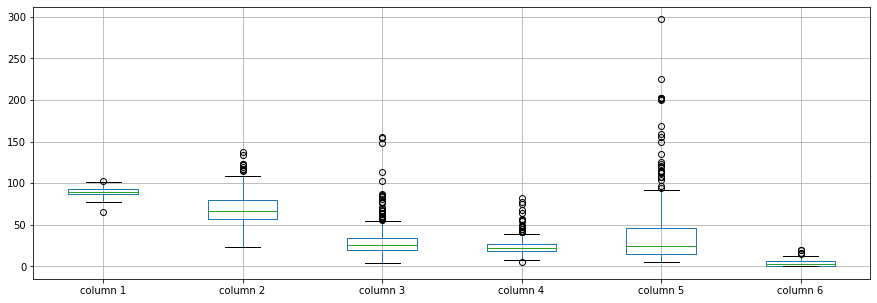

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.159420
column 2    69.926901
column 3    30.592262
column 4    24.549708
column 5    38.284058
column 6     3.464912
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.043777,0.141752,0.188865,0.222314,0.316304
column 2,0.043777,1.000000,0.082287,0.139856,0.131794,0.107900
column 3,0.141752,0.082287,1.000000,0.745837,0.501782,0.205106
column 4,0.188865,0.139856,0.745837,1.000000,0.516812,0.281569
column 5,0.222314,0.131794,0.501782,0.516812,1.000000,0.340816
column 6,0.316304,0.107900,0.205106,0.281569,0.340816,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+24,6+24+24,6+24+24+24,6+24+24+24+24,6+24+24+24,6+24+24,6+24,6], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=24)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 279.02011326381137
Epoch: 1 , loss: 280.5750158400763
Epoch: 2 , loss: 278.66292390369233
Epoch: 3 , loss: 279.1436825706845
Epoch: 4 , loss: 280.11927650088353
Epoch: 5 , loss: 279.68644569033665
Epoch: 6 , loss: 277.10762677873885
Epoch: 7 , loss: 278.570795694987
Epoch: 8 , loss: 277.74029323032926
Epoch: 9 , loss: 279.86302621024
Epoch: 10 , loss: 279.7854192824591
Epoch: 11 , loss: 278.119132632301
Epoch: 12 , loss: 279.2633034842355
Epoch: 13 , loss: 279.33802504766555
Epoch: 14 , loss: 278.90643019903274
Epoch: 15 , loss: 280.2578873407273
Epoch: 16 , loss: 278.53862726120724
Epoch: 17 , loss: 280.57670011974517
Epoch: 18 , loss: 280.51778520856584
Epoch: 19 , loss: 277.71158200218565
Epoch: 20 , loss: 279.0597912016369
Epoch: 21 , loss: 278.6230824788411
Epoch: 22 , loss: 277.0466780889602
Epoch: 23 , loss: 279.2195020403181
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0.0,0.000000,0.0,0,0.0
1,0,0.0,0.000000,0.0,0,0.0
2,0,0.0,0.000000,0.0,0,0.0
3,0,0.0,-33.904867,0.0,0,0.0
4,0,0.0,0.000000,0.0,0,0.0
...,...,...,...,...,...,...
340,0,0.0,0.000000,0.0,0,0.0
341,0,0.0,0.000000,0.0,0,0.0
342,0,0.0,0.000000,0.0,0,0.0
343,0,0.0,0.000000,0.0,0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

146.6526871903195

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [19]:
NRMS=numerator/denominator
NRMS


0.05820100542791867

In [20]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.000000,27.0,31,0.0
1,85,64.0,59.000000,32.0,23,0.0
2,86,54.0,33.000000,16.0,54,0.0
3,91,78.0,0.095133,24.0,36,0.0
4,98,55.0,13.000000,17.0,17,0.0
...,...,...,...,...,...,...
340,91,54.0,25.000000,22.0,35,4.0
341,89,48.0,32.000000,22.0,14,4.0
342,85,52.0,22.000000,23.0,34,4.0
343,95,93.0,21.000000,27.0,47,6.0


In [22]:
imputations[-1].to_excel("Bupa_NG_1(imp).xlsx", index=False, header=False)